# House Sale Analysis & Regression Model For King County

## Project Review

### Business Problem

#### Compass homeowners real estate agency is having a challenge providing insight to homeowners regarding house pricing and home renovations. This is after the customer query department noted an influx in the number of queries pertaining to the the pricing and price impact after renovations. The agency needs to develop a predictive model that can accurately estimate the impact of various renovation projects on a home's market value within the region.

#### The goal is to offer data-driven recommendations to homeowners, enabling them to make informed decisions about which renovations to undertake and how these renovations will affect the resale value of their homes.

#### The questions to be answered are:

#### 1. What is the most significant factor that influences the house pricing in the region? 
#### 2. What other features when put into consideration could improve the pricing and yield higher returns? 
#### 3. How much can a homeowner expect the value of their home to increase after a specific renovation project?


### Data Understanding

#### The King County House Sales dataset is used for this analysis. The file contains information on over 21,000 housing units. The data is organized into a dataframe with several columns containing information on the housing units. See the columns contained in the dataset along with their descriptions:

* **id** - Unique identifier for a house
* **date** - Date house was sold
* **price** - Sale price (prediction target)
* **bedrooms** - Number of bedrooms
* **bathrooms** - Number of bathrooms
* **sqft_living** - Square footage of living space in the home
* **sqft_lot** - Square footage of the lot
* **floors** - Number of floors (levels) in house
* **waterfront** - Whether the house is on a waterfront Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* **view** - Quality of view from house Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* **condition** - How good the overall condition of the house is. Related to maintenance of house. See the King County Assessor Website for further explanation of each condition code
* **grade** - Overall grade of the house. Related to the construction and design of the house. See the King County Assessor Website for further explanation of each building grade code
* **sqft_above** - Square footage of house apart from basement
* **sqft_basement** - Square footage of the basement
* **yr_built** - Year when house was built
* **yr_renovated** - Year when house was renovated
* **zipcode** - ZIP Code used by the United States Postal Service
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors
#### The columns used in the analysis are:

* price - Predictor Variable
* condition
* bedrooms
* bathrooms
* sqft_living
* floors

### Import Libraries

In [91]:
#Libraries for data analysis
import pandas as pd
import numpy as np
#Libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Libraries for machine learning
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

### Data Loading

In [92]:
#Load the data in the housing_data variable
housing_data = pd.read_csv('data/kc_house_data.csv')
housing_data.head() #view the first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [93]:
#view the last 5 rows
housing_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [94]:
#view the shape of the dataframe
housing_data.shape

(21597, 21)

* The dataframe has 21597 rows and 21 columns

In [95]:
#to view the columns
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [96]:
#to inspect the dataframe details/info
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* The data types available include float, int and object
* The columns with null values include waterfront, view and yr_renovated

### Data Cleaning

In [97]:
housing_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

* Waterfront has 2376 null values, view has 63 and yr_renovated has 3842 null values
* The columns we intend to use do not have any missing values. 

### Data Preparation

##### For our modeling analysis, we shall use the following columns 
* price
* floors
* bathrooms
* bedrooms
* sqft_living
* condition



##### How did we know what columns to use?

In [98]:
#We did a correlation check with the y variable price.
correlation_with_price = housing_data.corr()['price'].sort_values(ascending=False)
print(correlation_with_price)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64


* We note that sqft_living is most correlated to Price followed by grade.
* Using our domain knowledge sqft_living, bathrooms, bedrooms, condition and number of floors seem to be reasonable factors to consider when choosing a house.

In [99]:
# create a new data set with the relevant columns to proceed with
housing_data_selected = housing_data.drop(['date','id',
       'sqft_lot', 'waterfront', 'view','grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],axis=1)
housing_data_selected.head()  


,price,bedrooms,bathrooms,sqft_living,floors,condition
0,221900.0,3,1.00,1180,1.0,3
1,538000.0,3,2.25,2570,2.0,3
2,180000.0,2,1.00,770,1.0,3
3,604000.0,4,3.00,1960,1.0,5
4,510000.0,3,2.00,1680,1.0,3


### Data Cleaning On Selected Columns

In [100]:
#view the selected columns null values
housing_data_selected.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
dtype: int64

* Our data does not have any null values.

#### Visualization For The Selected Variables Against Price

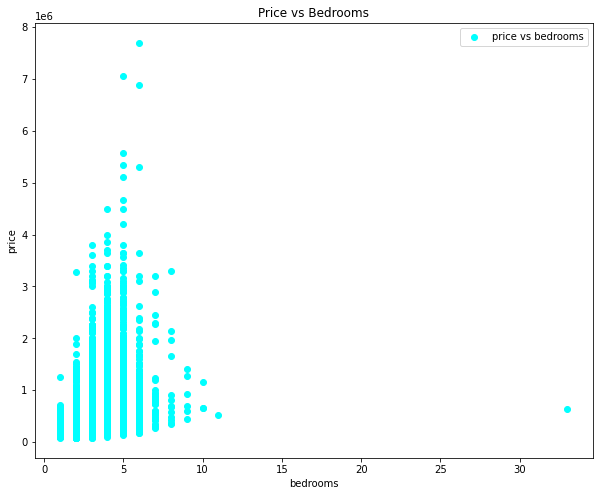

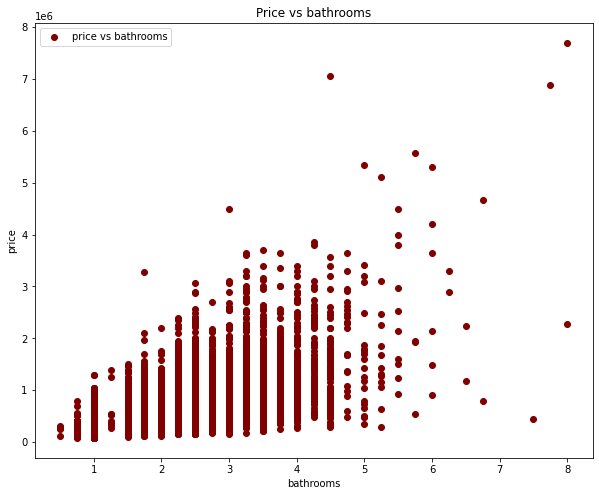

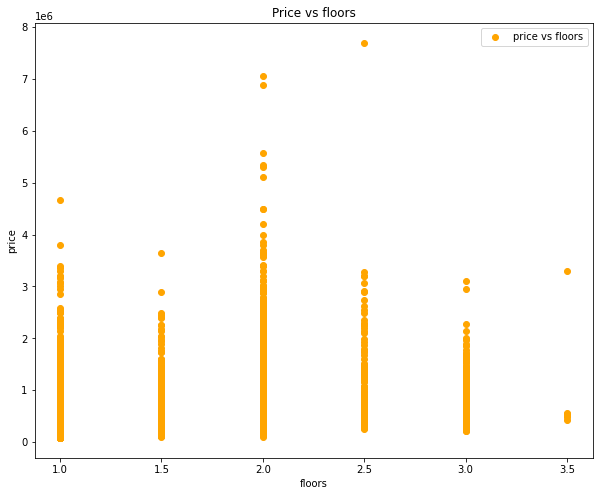

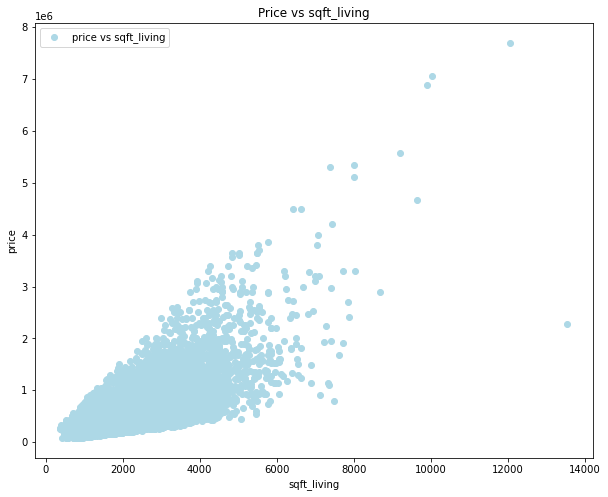

In [101]:
# Create scatter plots showing the corr between the price and bedrooms, bathrooms, sqft_living, floors
plt.figure(figsize=(10,8))
plt.scatter(data=housing_data_selected, x='bedrooms', y='price', color='cyan')

plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Price vs Bedrooms')
plt.legend(['price vs bedrooms'])
plt.show();

plt.figure(figsize=(10,8))
plt.scatter(data=housing_data_selected, x='bathrooms', y='price', color='maroon')

plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('Price vs bathrooms')
plt.legend(['price vs bathrooms'])
plt.show();

plt.figure(figsize=(10,8))
plt.scatter(data=housing_data_selected, x='floors', y='price', color='orange')

plt.xlabel('floors')
plt.ylabel('price')
plt.title('Price vs floors')
plt.legend(['price vs floors'])
plt.show();

plt.figure(figsize=(10,8))
plt.scatter(data=housing_data_selected, x='sqft_living', y='price', color='lightblue')

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Price vs sqft_living')
plt.legend(['price vs sqft_living'])
plt.show();

* From the visualization above we note that sqft_living has a positive correlation with price.
* We also have a close to normal distribution for the bedroom column to price.
* From the visualization above we note that many houses have 2 floors.
* The price also increases as the number of room

In [102]:
#To view the statistical details of the dataframe
housing_data_selected.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.494096,3.409825
std,3.673681e+05,0.926299,0.768984,918.106125,0.539683,0.650546
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,3.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,3.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,4.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,5.000000


* From the above description we note that the maximum number of bedrooms are 33 and the minimum 1. The maximum number looks like an outlier. We shall proceed to visualize the data.

#### Visualization To View the Outliers

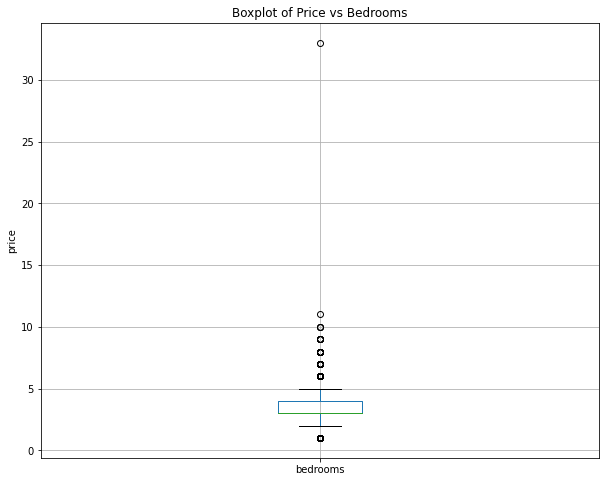

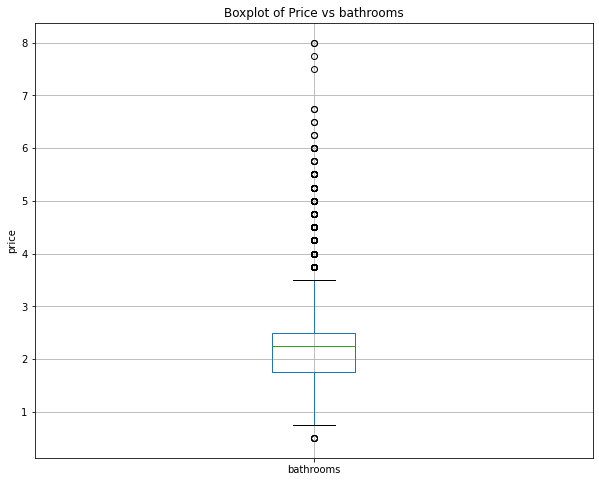

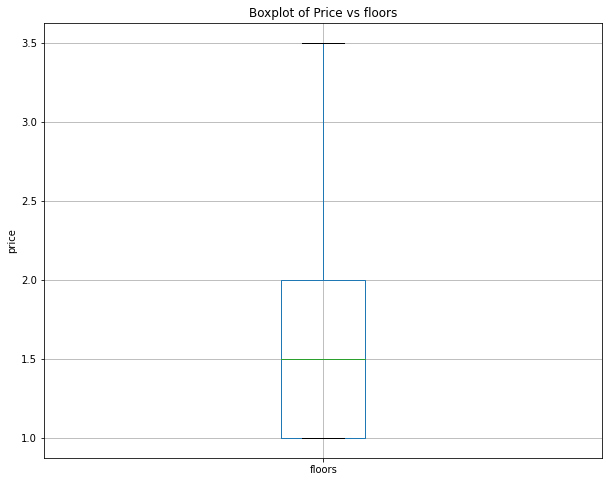

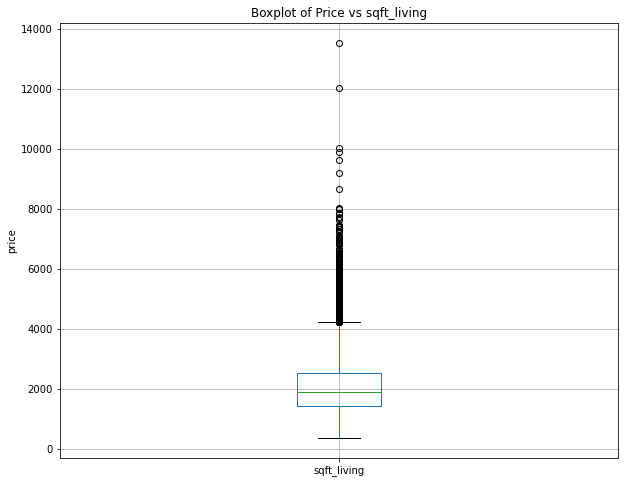

In [103]:
# Create a boxplot for all columns
plt.figure(figsize=(10,8))
housing_data_selected.boxplot(column='bedrooms')
plt.title('Boxplot of Price vs Bedrooms')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10,8))
housing_data_selected.boxplot(column='bathrooms')
plt.title('Boxplot of Price vs bathrooms')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10,8))
housing_data_selected.boxplot(column='floors')
plt.title('Boxplot of Price vs floors')
plt.ylabel('price')
plt.show()

plt.figure(figsize=(10,8))
housing_data_selected.boxplot(column='sqft_living')
plt.title('Boxplot of Price vs sqft_living')
plt.ylabel('price')
plt.show()


#### Dealing With the Outlier on the Bedroom column

In [104]:
# Fixing incorrect bedroom data with the mode of the column as the 33 as the maximum value might be a result of wrongly typing
housing_data_selected.loc[(housing_data_selected.bedrooms == 33), 'bedrooms'] = housing_data_selected['bedrooms'].mode()

* The mode for the column is 3. 

#### Inspecting the Sum Values of Outliers

In [105]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = housing_data_selected.quantile(0.25)
Q3 = housing_data_selected.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((housing_data_selected < (Q1 - 1.5 * IQR)) | (housing_data_selected > (Q3 + 1.5 * IQR)))

# Count the number of outliers in each column
outlier_count = outliers.sum()

print(outlier_count)

price          1158
bedrooms        529
bathrooms       561
sqft_living     571
floors            0
condition        29
dtype: int64


* In this analysis we will proceed without removing the above outliers as this gives us insight on the dataset and are legitimate observations that are crucial for our analysis. Removing them might lead to the loss of valuable information and potential insights.


#### Drop Duplicates

In [106]:
# Drop duplicates from the selected dataset
housing_data_selected = housing_data_selected.drop_duplicates()

In [107]:
#Check for null values or placeholders
housing_data_selected.isnull().sum()

price          0
bedrooms       1
bathrooms      0
sqft_living    0
floors         0
condition      0
dtype: int64

In [108]:
#Fill the null value in the bedroom column with the mode of the column
housing_data_selected['bedrooms'] = housing_data_selected['bedrooms'].fillna(housing_data_selected['bedrooms'].mode()[0])

In [109]:
#confirm that we do not have a null value
housing_data_selected.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
dtype: int64

In [110]:
#To now confirm the statistical details of the new dataframe
housing_data_selected.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition
count,2.143900e+04,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000
mean,5.412164e+05,3.373338,2.116820,2082.904520,1.492817,3.411400
std,3.682951e+05,0.905040,0.768999,919.208085,0.538944,0.651573
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000,1.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,1.000000,3.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,1.500000,3.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,4.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,3.500000,5.000000


* The maximum number of rooms have reduced from 33 now to 11. 

#### A pairplot to view the distribution of the selected columns

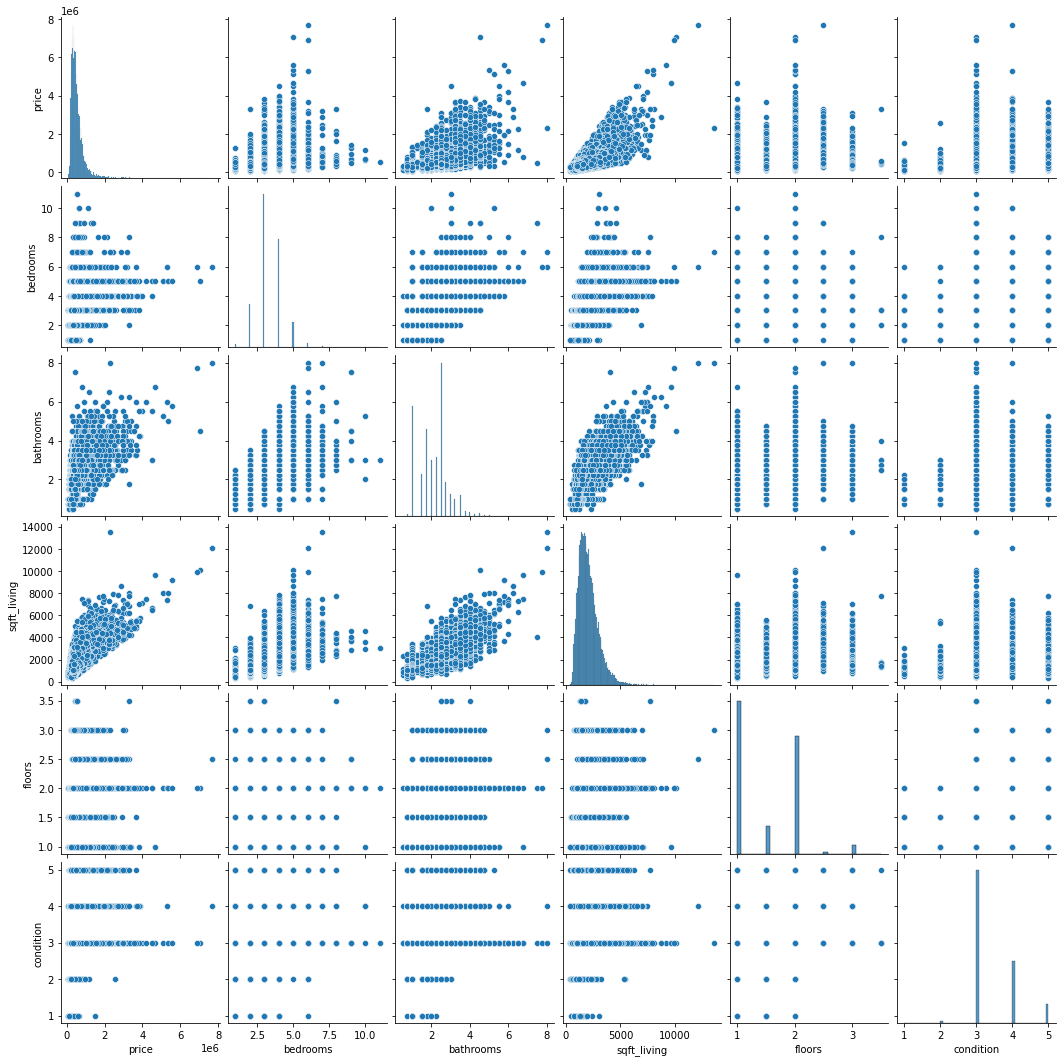

In [111]:
sns.pairplot(data=housing_data_selected);

* From the above pairplot we note that the column price and sqft_living have a normal distribution.

#### Correlation HeatMap


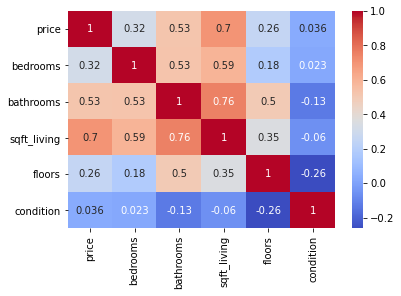

In [112]:
#to view the correlation matrix
sns.heatmap(housing_data_selected.corr(),cmap="coolwarm",annot=True);

In [113]:
#To check the correlation of the selected columns with the target column price
# Create a figure and axes
housing_data_selected.corr()['price'].sort_values(ascending=False)


price          1.000000
sqft_living    0.701884
bathrooms      0.526315
bedrooms       0.315498
floors         0.257560
condition      0.035944
Name: price, dtype: float64

##### From the output above, the following can be observed:

* 'price' has a perfect correlation of 1.000000 since any variable has a perfect correlation with itself.
* 'sqft_living' has the highest positive correlation with 'price' at approximately 0.7019. This indicates that there is a strong positive linear relationship between the square footage of living space ('sqft_living') and the price of houses. As the square footage of living space increases, the price tends to increase.
* bathrooms' has a positive correlation of approximately 0.5259 with 'price,' suggesting that as the number of bathrooms in a house increases, the price tends to increase, although the relationship is not as strong as with 'sqft_living.'
* bedrooms' has a positive correlation of approximately 0.3159 with 'price,' indicating that as the number of bedrooms increases, the price tends to increase, but again, this relationship is weaker than with 'sqft_living' and 'bathrooms.'
* floors' has a positive correlation of approximately 0.2568 with 'price,' suggesting that as the number of floors in a house increases, the price tends to increase, but this relationship is also weaker compared to 'sqft_living' and 'bathrooms.'

#### Feature Scaling the column sqft_living

In [114]:
#To scale the price 
scaler = StandardScaler()
housing_data_selected[['sqft_living']] = scaler.fit_transform(housing_data_selected[['sqft_living']])

##### Linear Regression of how square foot of the living area affects the price

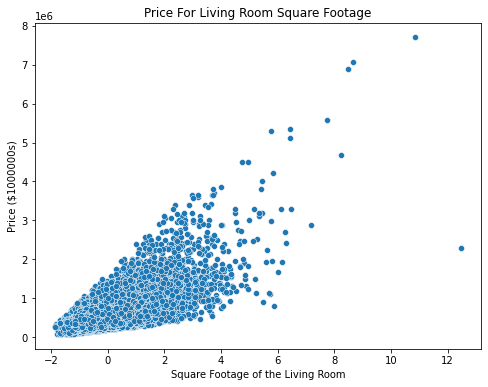

In [115]:
#Visualize the impact of sqft_living on the price of the house
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=housing_data_selected)
plt.title('Price For Living Room Square Footage')
plt.xlabel('Square Footage of the Living Room')
plt.ylabel('Price ($1000000s)')
plt.show();

* The above visualization shows the actual data estimates of the living area square footage
* We note from the above that the price of the house increases as the living room square footage increases. 

In [116]:
# Extracting value for y variable for our baseline model
y = housing_data_selected["price"]
# Extracting value for X variable for our baseline model
X_baseline = housing_data_selected[["sqft_living"]]

In [117]:
# Fit the OLS model with the baseline variables
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

# Print the summary of the model results
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.082e+04
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:02:18   Log-Likelihood:            -2.9792e+05
No. Observations:               21439   AIC:                         5.958e+05
Df Residuals:                   21437   BIC:                         5.959e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.412e+05   1791.685    302.071      

##### Interpratation of the Results Above
* R-squared (R²): The R-squared value is 0.493, indicating that approximately 49.3% of the variance in 'price' can be explained by the linear relationship with 'sqft_living'.

* The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05 alpha.

* The coefficient of sqft_living is 258,500. For each square foot increase the price is expected to increase by 258,500.

#### Actual Versus Predicted Value Visualization

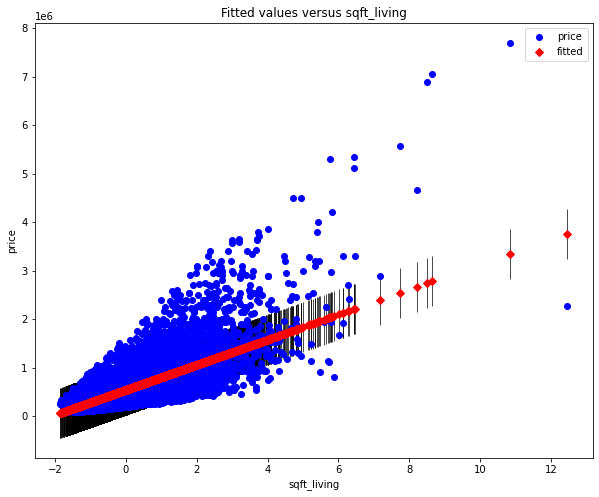

In [118]:
# Create a figure and axes to show the actual versus predicted values
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the fit using the baseline_results
sm.graphics.plot_fit(baseline_results, "sqft_living", ax=ax)

# Display the plot
plt.show()

#### Regression Diagnostic Plot For the Linear Model

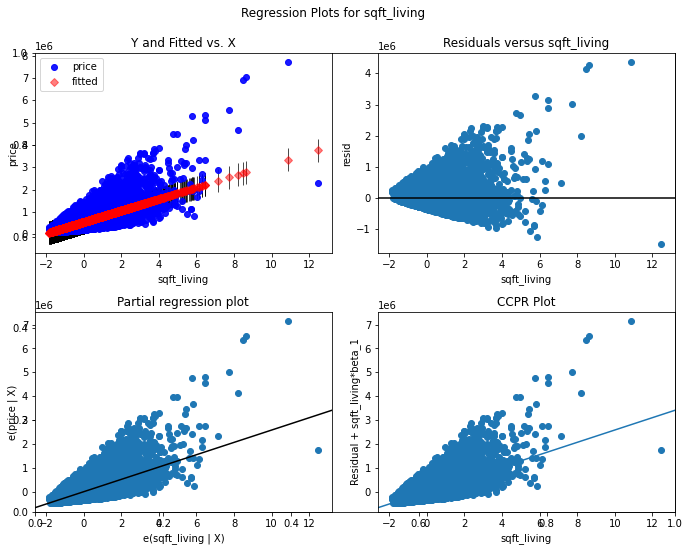

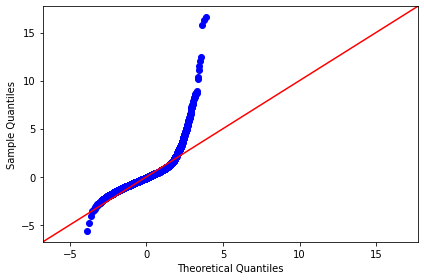

In [119]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

fig = sm.graphics.plot_regress_exog(baseline_results, 'sqft_living', fig=fig) 
fig = sm.graphics.qqplot(baseline_results.resid, dist=stats.norm,line='45', fit=True)  #To check the normality of the residuals
fig.tight_layout()
plt.show();

* The image shows a plot of the regression with the "sqft_living" as the exogenous variable
* Plot 1: The dependent variable vs. sqft_living with the regression line.
* Plot 2: Residuals vs. sqft_living to check for homoscedasticity (constant variance of residuals).
* Plot 3: Partial regression plot to show the relationship between price and sqft_living while accounting for other variables.
* Plot 4: The leverage plot to detect influential data points.
* Plot 5: The Q-Q plot to check the normality of residuals.

##### Data Preparation For the Linear Model

In [120]:
#Assign the X and y variables
X = housing_data_selected[['sqft_living']]
y = housing_data_selected['price']

##### Train Test Split

In [121]:
#train_test_split using 0.8 as the train and 0.2 as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

##### Modeling

In [122]:
#Training our linear model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [123]:
#run the y_predict
y_pred = model.predict(X_test)

##### Model Validation

In [124]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))


173945.37027252943
68440694388.97133
0.49853717233689554


* Our validation was successful as the R-squared value on the validation dataset is close to the R-squared value on the training dataset, indicating that the model generalizes well and is not overfitting.

#### Multiple Linear Regression

In [125]:
# Extracting value for y variable for our baseline model
y = housing_data_selected["price"]
# Extracting value for X variable for our baseline model
x_baseline = housing_data_selected[["sqft_living", "bathrooms", "bedrooms", "condition", "floors"]]
#include all the independent variables selected

In [126]:
# Extracting value for y variable for our baseline model
y = housing_data_selected["price"]

# Extracting value for X variable for our baseline model
x_baseline = housing_data_selected[["sqft_living", "bathrooms", "bedrooms", "condition", "floors"]]

# Print the columns with missing values if any
print("Columns with missing values:\n", x_baseline.columns[x_baseline.isnull().any()])

# Drop rows with missing values if any
x = x_baseline.dropna(inplace=True)
y = y[x_baseline.index]  # Update y to match the rows of x_baseline after dropping NaNs

# Fit the OLS model with the baseline variables
baseline_model = sm.OLS(y, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()

# Print the summary of the model results
print(baseline_results.summary())

Columns with missing values:
 Index([], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     4583.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:02:24   Log-Likelihood:            -2.9740e+05
No. Observations:               21439   AIC:                         5.948e+05
Df Residuals:                   21433   BIC:                         5.949e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

<ipython-input-126-37648dc8c0fa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x = x_baseline.dropna(inplace=True)


##### Interpratation of the Results Above
* R-squared (R²): The R-squared value is 0.517, indicating that approximately 51.7% of the variance in 'price' can be explained by the multiple relationship with 'sqft_living', 'floors', 'bathrooms','bedrooms' and 'condition'.

* The model coefficients are all statistically significant, with t-statistic p-values well below 0.05 alpha.
* The coefficient for sqft_living is 2.862e+05 (or 286,200), meaning that for each additional square foot of living space, the price is expected to increase by approximately 286,200 units of currency.
* Bathrooms: The coefficient is 1.231e+04 (or 12,310), suggesting that each additional bathroom increases the price by 12,310 units. This relationship is also statistically significant.
* Bedrooms: The negative coefficient -6.711e+04 (or -67,110) suggests that, holding other factors constant, an additional bedroom decreases the price, which might be counterintuitive and could warrant further investigation.
* Condition: The positive coefficient 5.417e+04 (or 54,170) indicates that better condition ratings are associated with higher prices.
* Floors: The coefficient 1.671e+04 (or 16,710) suggests that more floors are associated with higher prices.

##### Regression Diagnostic For The Multiple Regression

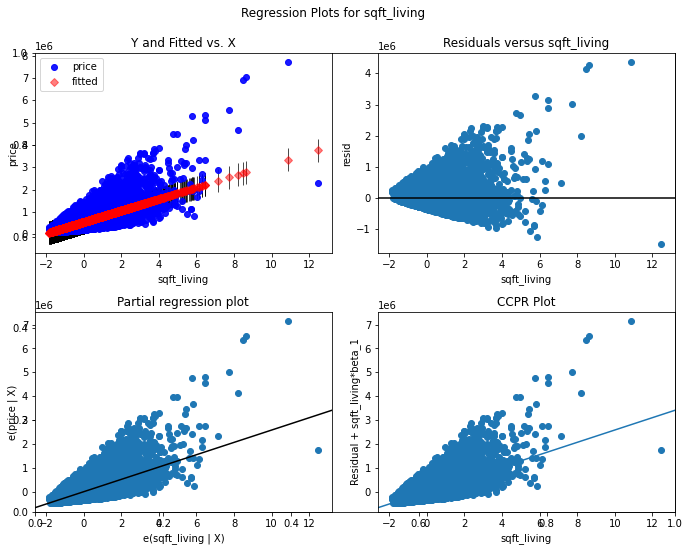

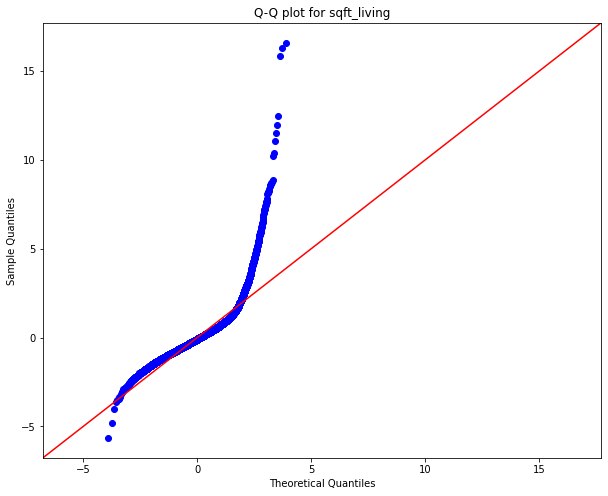

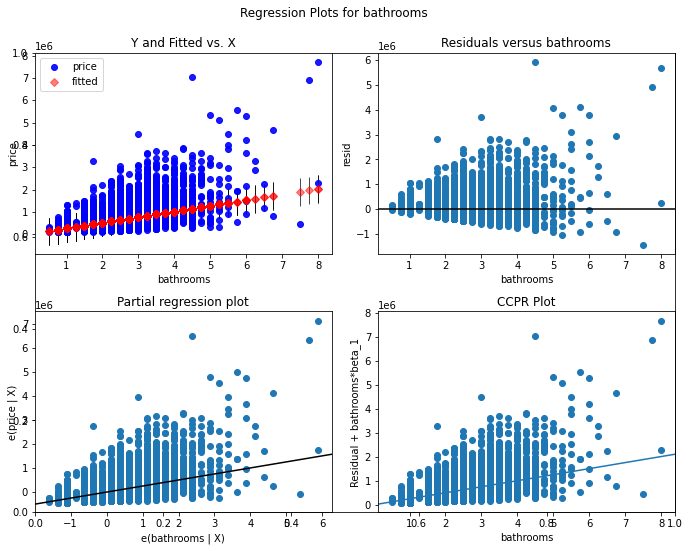

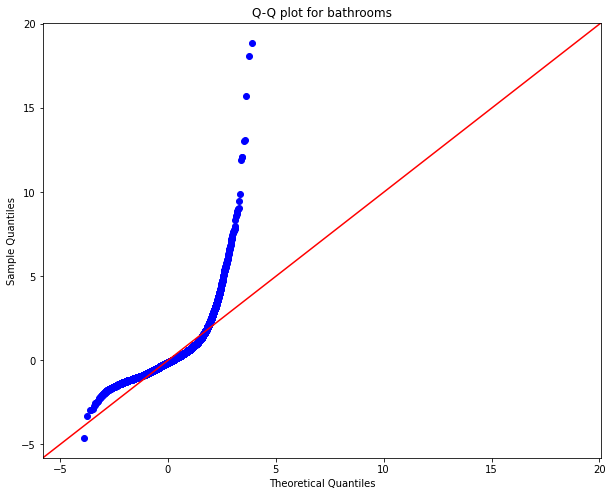

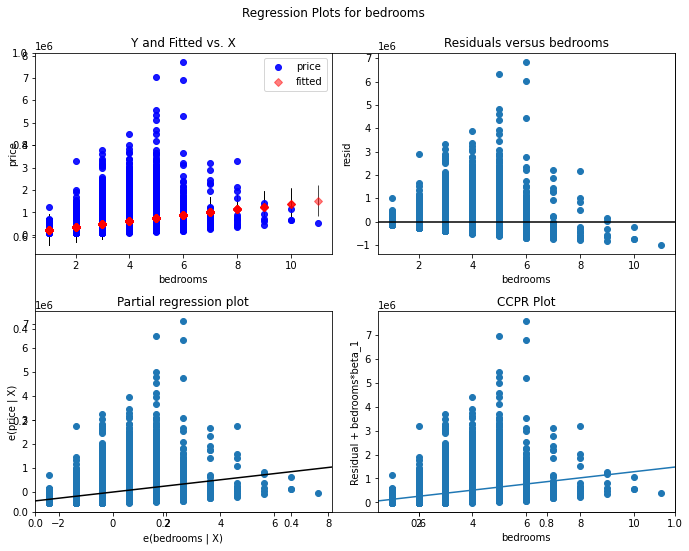

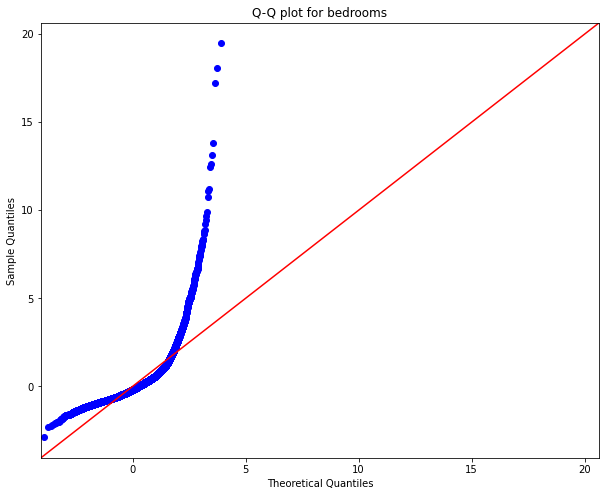

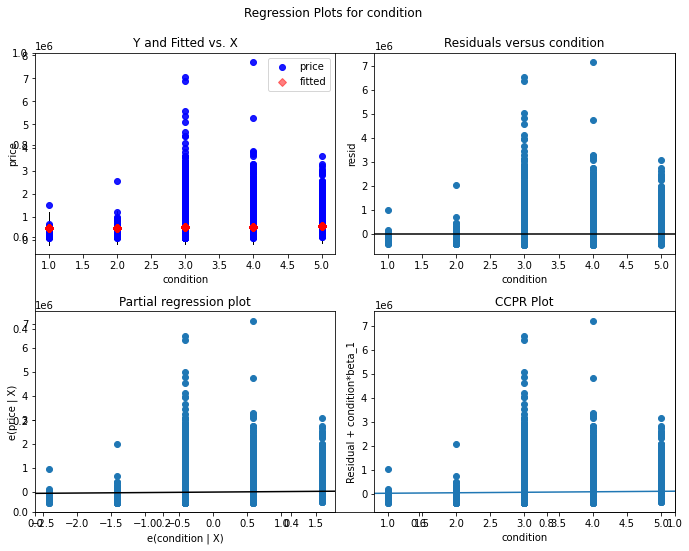

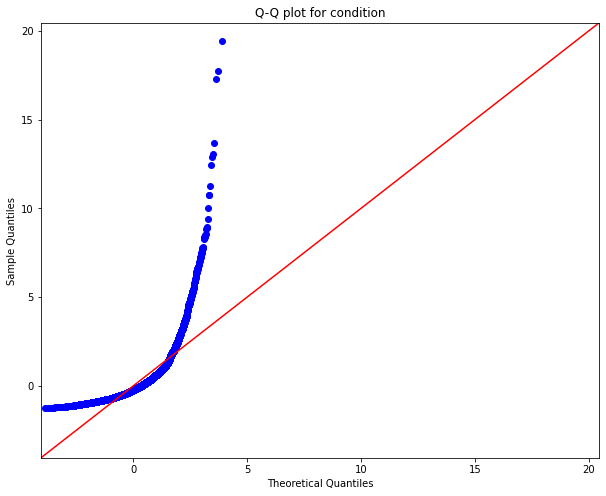

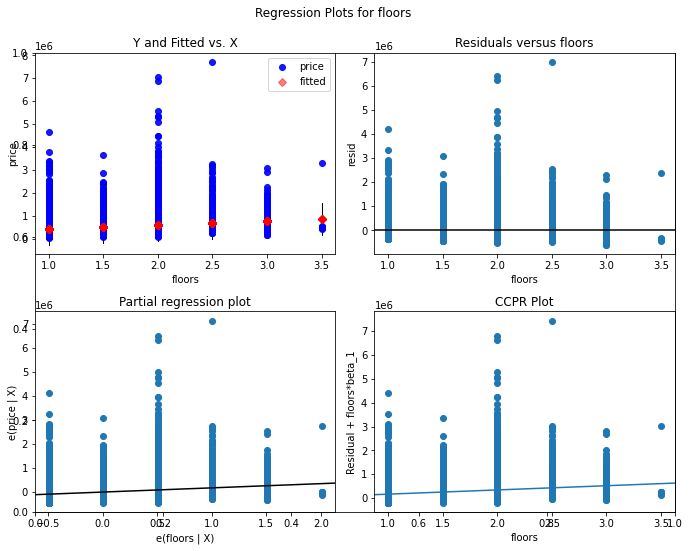

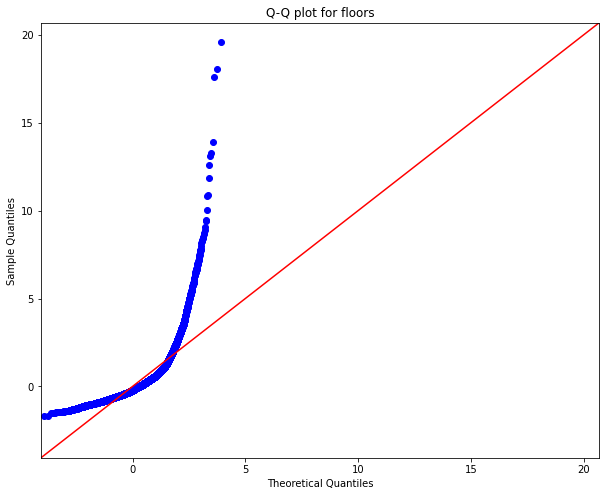

In [127]:
#initialize empty list in the variable name results
results = []

columns = ["sqft_living", "bathrooms", "bedrooms", "condition", "floors"]

# Loop through each column and fit an OLS model
for col in columns:
    formula = f'price ~ {col}'
    model = smf.ols(formula=formula, data=housing_data_selected).fit()
    results.append(model)

# Plotting regression diagnostics for each model
for i, model in enumerate(results):
    col = columns[i]
    
    # Create a figure and axes for regression plots
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot regression diagnostics for the specific column
    sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()
    
    # Create a figure and axes for Q-Q plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Q-Q plot to check the normality of the residuals
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax)
    plt.title(f'Q-Q plot for {col}')
    plt.show()

* The plots show the regression with the different independent variables as highlighted on the title.
* The Q-Q plots are also used to visualize the normality of the variables - we note that sqft_living performs better in terms of normality test than the other variables.

#### Data Preparation For Multiple Model

In [128]:
x = housing_data_selected[["sqft_living", "bathrooms", "bedrooms", "condition", "floors"]]
y = housing_data_selected['price']

In [129]:
#train_test_split using 0.8 as the train and 0.2 as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

#### Modeling

In [130]:
#Here we are training our model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#### Model Validation

In [132]:
y_pred = model.predict(x_test)

In [134]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

168621.56203529594
65080954082.45496
0.5231538845044287


* The Multiple regression model has a lower mae and mse and an better r2 score making it a better model.

#### Conclusions

* The most significant feature/factor that influences the house pricing at King County is the living area square footage. From our analysis we observe that the price increases by $258500 when the square footage increase when all other factors are kept constant.

* The other factors put into consideration that would positively influence the pricing is the number of bedrooms, bathrooms, floors and the condition of the house that is whether poor, fair, good, average or very good.This is observed from our multiple model that performs so much better.
